In [2]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from src.algorithms import ConvolutionalAEAlg

In [14]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

# Download the training and test datasets
train_data = torchvision.datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
val_data = torchvision.datasets.CIFAR10(root='data', train=False, download=True, transform=transform)
print(np.unique(val_data.targets))

# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, num_workers=0)
test_loader = torch.utils.data.DataLoader(val_data, batch_size=32, num_workers=0)

labels = list(train_data.class_to_idx.keys())
num_channels = 3
num_classes = len(np.unique(train_data.targets))

model = ConvolutionalAEAlg(num_channels=num_channels, num_filters=num_classes, learning_rate=0.001)

Files already downloaded and verified
Files already downloaded and verified
[0 1 2 3 4 5 6 7 8 9]
Running on CPU


In [4]:
# test model
X_out = []
y_out = []
with torch.no_grad():
    for X, y in test_loader:
        model.alg.eval()
        reconstructed = model.alg.forward(X.to(model.device))
        X_out += reconstructed
        y_out += y

In [23]:
# train model
max_epochs = 30
print("Train model for {} epochs".format(max_epochs))
model.partial_fit(X=train_loader, num_iterations=max_epochs)

Train model for 30 epochs


KeyboardInterrupt: 

In [17]:
# test model
print("Test model")
X_out = []
y_out = []
with torch.no_grad():
    for X, y in test_loader:
        print(y)
        model.alg.eval()
        reconstructed = model.alg.forward(X.to(model.device))
        X_out += reconstructed
        y_out = np.concatenate([y_out, y])

Test model
tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5])
tensor([4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8,
        7, 7, 4, 6, 7, 3, 6, 3])
tensor([6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
        8, 9, 0, 3, 8, 6, 4, 6])
tensor([6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3])
tensor([5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9,
        6, 0, 0, 5, 2, 9, 5, 4])
tensor([2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2,
        3, 8, 6, 3, 4, 0, 5, 8])
tensor([0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0,
        7, 9, 8, 2, 7, 6, 9, 4])
tensor([3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9,
        2, 2, 5, 3, 9, 9, 4, 0])
tensor([3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3,
     

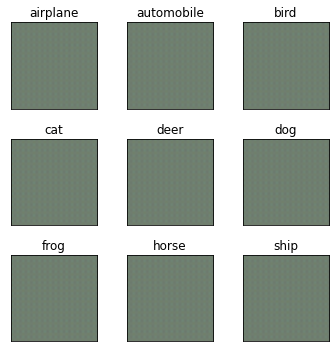

In [26]:
# plot data
fig, axes = plt.subplots(ncols=3, nrows=3, sharex="all", sharey="all", figsize=[5, 5])
for class_label in range(num_classes-1):
    ax = axes.flatten()[class_label]
    indices = [i for i in range(len(y_out)) if y_out[i] == class_label]
    selected_index = np.random.choice(indices)
    image = X_out[selected_index]
    label = y_out[selected_index]
    ax.imshow(np.moveaxis(image.numpy(), 0, 2))
    ax.set_title(labels[class_label])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.tight_layout()
plt.show()